# Simulated annealing using function

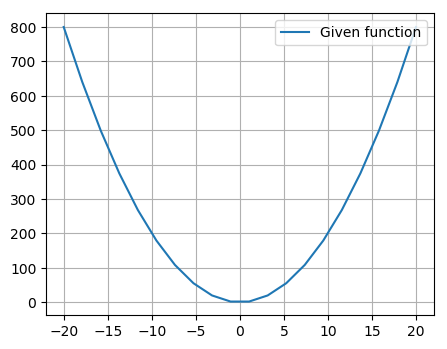

In [281]:
# Given function plot in range (-20, 20), lets plot the function first
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x1**2 + x2**2

x1 = np.linspace(-20., 20., 20)
x2 = np.linspace(-20., 20., 20)
z = f(x)
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
plt.grid()
plt.plot(x1, z,label='Given function')
plt.legend(loc=1)
plt.show()

Cycle: 0 with Temperature: 2.8036732520571284
Cycle: 1 with Temperature: 2.7209887640887547
Cycle: 2 with Temperature: 2.640742764466188
Cycle: 3 with Temperature: 2.5628633385466855
Cycle: 4 with Temperature: 2.4872806925571194
Cycle: 5 with Temperature: 2.413927091046384
Cycle: 6 with Temperature: 2.34273679618242
Cycle: 7 with Temperature: 2.2736460088394645
Cycle: 8 with Temperature: 2.206592811422722
Cycle: 9 with Temperature: 2.141517112379222
Cycle: 10 with Temperature: 2.078360592345133
Cycle: 11 with Temperature: 2.017066651881274
Cycle: 12 with Temperature: 1.9575803607499829
Cycle: 13 with Temperature: 1.8998484086878822
Cycle: 14 with Temperature: 1.8438190576304339
Cycle: 15 with Temperature: 1.7894420953454597
Cycle: 16 with Temperature: 1.7366687904340792
Cycle: 17 with Temperature: 1.6854518486587362
Cycle: 18 with Temperature: 1.6357453705591776
Cycle: 19 with Temperature: 1.5875048103183984
Cycle: 20 with Temperature: 1.5406869358416933
Cycle: 21 with Temperature: 1.4

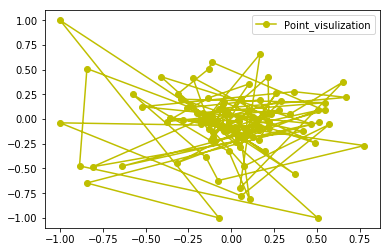

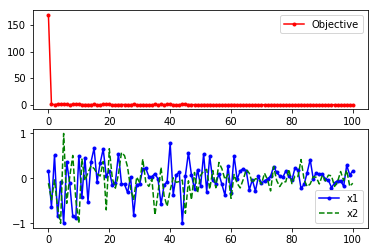

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj= x1**2 + x2**2 
    return obj

# initial pooint

x_start = np.array ([- 5.0, 12.0])



# Simulated Annealing


# Number of cycles
n = 100
# Number of trials per cycle
m = 100
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0/math.log(p1)
# Final temperature
t50 = -1.0/math.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))
# Initialize 
x = np.zeros((n+1,2))
x[0] = x_start
xi = np.zeros(2)
xi = x_start
na = na + 1.0
# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = f(xi)
fs = np.zeros(n+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0
for i in range(n):
    print ('Cycle: ' + str(i) + ' with Temperature: ' + str(t))
    for j in range(m):
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        DeltaE = abs(f(xi)-fc)
        if (f(xi)>fc):
            #   on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # objective function is worse
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                
                accept = False
        else:
            
            accept = True
        if (accept==True):
            # update currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            fc = f(xc)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    
    t = frac * t

# print solution
print ('Best solution: ' + str(xc))
print ('Best objective: ' + str(fc))


# plot solution 

plt.plot(x[:,0],x[:,1],'y-o',label='Point_visulization')
plt.legend()
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(fs,'r.-')
ax1.legend(['Objective'])
ax2 = fig.add_subplot(212)
ax2.plot(x[:,0],'b.-')
ax2.plot(x[:,1],'g--')
ax2.legend(['x1','x2'])
plt.show()


# Simulated annealing using basinhopping

In [280]:
#In present version scipy.optimize.minimize is replaced by basinhopping, 
#Indeed, new version is improved and find enough good result

import numpy as np
import scipy
from scipy.optimize import basinhopping
%matplotlib inline



def fun(x):
    
    f=x[0]**2 + x[1]**2
    df = np.zeros(2)
    return f,df

# optimization process 
x_start = np.array ([- 5.0, 12.0])
minimizer_kwargs = {"method": "L-BFGS-B","jac":True}
result = basinhopping(fun, x0, niter=500, T=1.0, stepsize=0.5, minimizer_kwargs=minimizer_kwargs,interval=100, disp=True,niter_success=None)
print("global minimum: x = [%.4f, %.4f], f(x) = %.4f" % (result.x[0],result.x[1],result.fun))


basinhopping step 0: f 169
basinhopping step 1: f 169 trial_f 173.421 accepted 0  lowest_f 169
basinhopping step 2: f 168.574 trial_f 168.574 accepted 1  lowest_f 168.574
found new global minimum on step 2 with function value 168.574
basinhopping step 3: f 168.574 trial_f 171.709 accepted 0  lowest_f 168.574
basinhopping step 4: f 168.574 trial_f 169.449 accepted 0  lowest_f 168.574
basinhopping step 5: f 156.676 trial_f 156.676 accepted 1  lowest_f 156.676
found new global minimum on step 5 with function value 156.676
basinhopping step 6: f 156.676 trial_f 160.224 accepted 0  lowest_f 156.676
basinhopping step 7: f 156.676 trial_f 158.379 accepted 0  lowest_f 156.676
basinhopping step 8: f 156.676 trial_f 166.44 accepted 0  lowest_f 156.676
basinhopping step 9: f 156.676 trial_f 161.44 accepted 0  lowest_f 156.676
basinhopping step 10: f 150.01 trial_f 150.01 accepted 1  lowest_f 150.01
found new global minimum on step 10 with function value 150.01
basinhopping step 11: f 137.185 tria